# Comparing DT and RandomForest on BMI Data

## Imports

In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt

# Data

Source: https://www.kaggle.com/datasets/sjagkoo7/bmi-body-mass-index?resource=download

In [2]:
data = pd.read_csv("./datasets/bmi_train.csv")
category_mapping = {'Male': 0, 'Female': 1}
data['Gender_Encoded'] = data['Gender'].map(category_mapping) # converts categorical data to numeric data.
X = data.drop(['Gender','Index'], axis=1)
y = data.drop(['Gender', 'Gender_Encoded', 'Height', 'Weight'], axis=1)
print("All X shape: ", X.shape)
print("All y shape: ", y.shape)

validation_data = pd.read_csv("./datasets/bmi_validation.csv")
print("Validation data shape: ", validation_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

All X shape:  (400, 3)
All y shape:  (400, 1)
Validation data shape:  (100, 3)
X_train shape:  (320, 3)
y_train shape:  (320, 1)
X_test shape:  (80, 3)
y_test shape:  (80, 1)


## Class Distribution

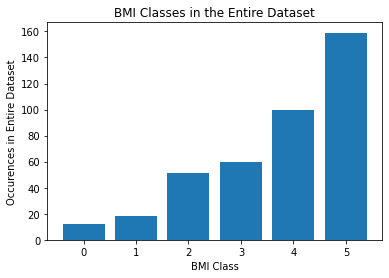

In [3]:
# Class imbalance, more obesity.
unique_values, counts = np.unique(y, return_counts=True)
plt.bar(unique_values, counts)
plt.title("BMI Classes in the Entire Dataset")
plt.xlabel("BMI Class")
plt.ylabel("Occurences in Entire Dataset")
plt.show()

## Feature Correlation

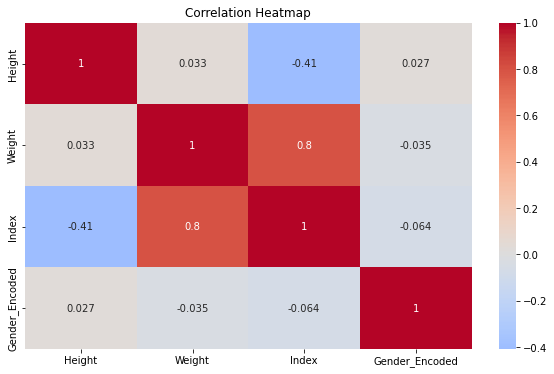

In [4]:

correlation_matrix = data.corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Distribution of Features

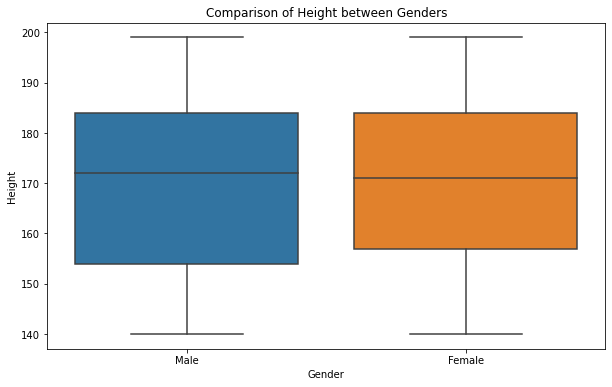

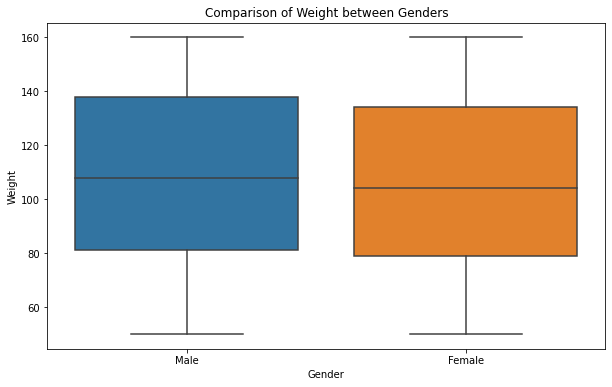

In [5]:
# Compare height and weight between male and female genders using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Height')
plt.title('Comparison of Height between Genders')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Weight')
plt.title('Comparison of Weight between Genders')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

# Building the DT Model

## Hyperparameter Tuning DT

In [6]:
param_grid = {
    'max_depth': [i for i in range(2, 10)],
    'min_samples_leaf': [2 ** i for i in range(0, 4)],
    'criterion': ["entropy", "gini"]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters:", best_params_dt)
print("Best Score:", grid_search_dt.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
Best Score: 0.8096901933379921


## Decision Tree Classifier

In [7]:
dt = DecisionTreeClassifier(max_depth=best_params_dt["max_depth"], min_samples_leaf=best_params_dt["min_samples_leaf"], criterion=best_params_dt["criterion"])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

## Decision Tree Visualization

[Text(0.5508928571428572, 0.9444444444444444, 'Weight <= 102.5\nentropy = 2.166\nsamples = 320\nvalue = [9, 13, 42, 48, 85, 123]\nclass = 5'),
 Text(0.2517857142857143, 0.8333333333333334, 'Weight <= 65.5\nentropy = 2.35\nsamples = 145\nvalue = [9, 13, 42, 41, 28, 12]\nclass = 2'),
 Text(0.08571428571428572, 0.7222222222222222, 'Height <= 169.5\nentropy = 1.864\nsamples = 44\nvalue = [9, 12, 18, 5, 0, 0]\nclass = 2'),
 Text(0.05714285714285714, 0.6111111111111112, 'Height <= 152.5\nentropy = 0.792\nsamples = 21\nvalue = [0, 0, 16, 5, 0, 0]\nclass = 2'),
 Text(0.04285714285714286, 0.5, 'Weight <= 57.0\nentropy = 0.863\nsamples = 7\nvalue = [0, 0, 2, 5, 0, 0]\nclass = 3'),
 Text(0.02857142857142857, 0.3888888888888889, 'Height <= 144.0\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]\nclass = 2'),
 Text(0.014285714285714285, 0.2777777777777778, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]\nclass = 3'),
 Text(0.04285714285714286, 0.2777777777777778, 'entropy = 0.0\nsam

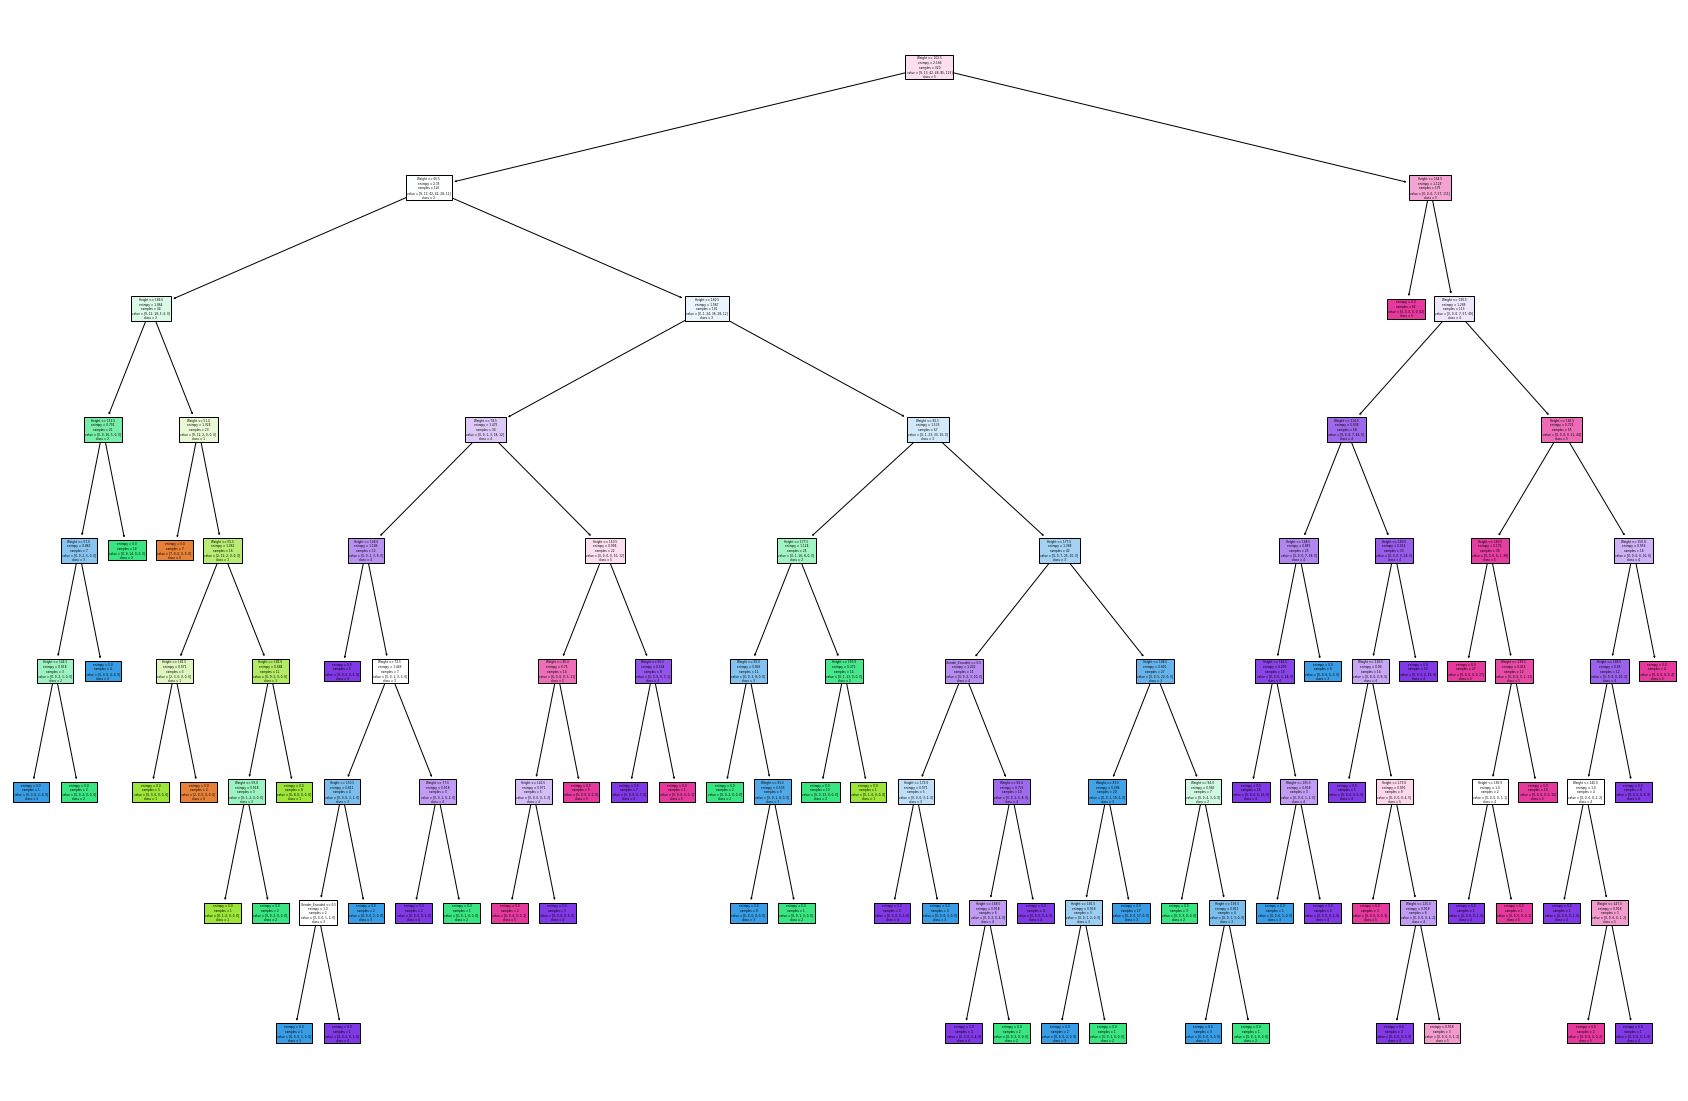

In [8]:
plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X_train.columns.tolist(), class_names=['0', '1', '2','3','4','5'], filled=True)

## Accuracy Results on Test Data

Text(0.5, 1.0, 'Model Predictions With 85.00% Accuracy')

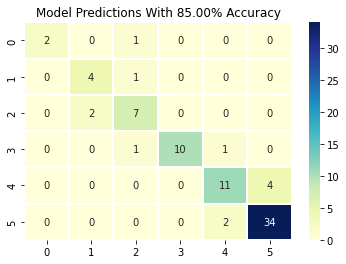

In [9]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(confusion_matrix, index=[f"{i}" for i in range(6)], columns=[f"{i}" for i in range(6)])
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", linewidths=0.35, cmap="YlGnBu")
plt.title(f"Model Predictions With {(np.sum(confusion_matrix.diagonal()) / y_test.shape[0]) * 100:.2f}% Accuracy")

# RandomForestClassifier

## Hyperparamter Tuning

In [11]:
param_grid = {
    'max_depth': [i for i in range(2, 10)],
    'min_samples_leaf': [2 ** i for i in range(0, 4)],
    'criterion': ["entropy", "gini"]
}

rf = RandomForestClassifier(random_state=42)

print(y_train.shape)
grid_search_rf = GridSearchCV(rf, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
grid_search_rf.fit(X_train, y_train.values.ravel())
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)
print("Best Score:", grid_search_rf.best_score_)


(320, 1)
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 300}
Best Score: 0.8255881667831352


## RandomForest Classifier

In [12]:
rf = RandomForestClassifier(n_estimators=300, 
                            max_depth=best_params_rf["max_depth"], 
                            min_samples_leaf=best_params_rf["min_samples_leaf"],
                            criterion=best_params_rf["criterion"])
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)

## Plotting the RandomForest Trees

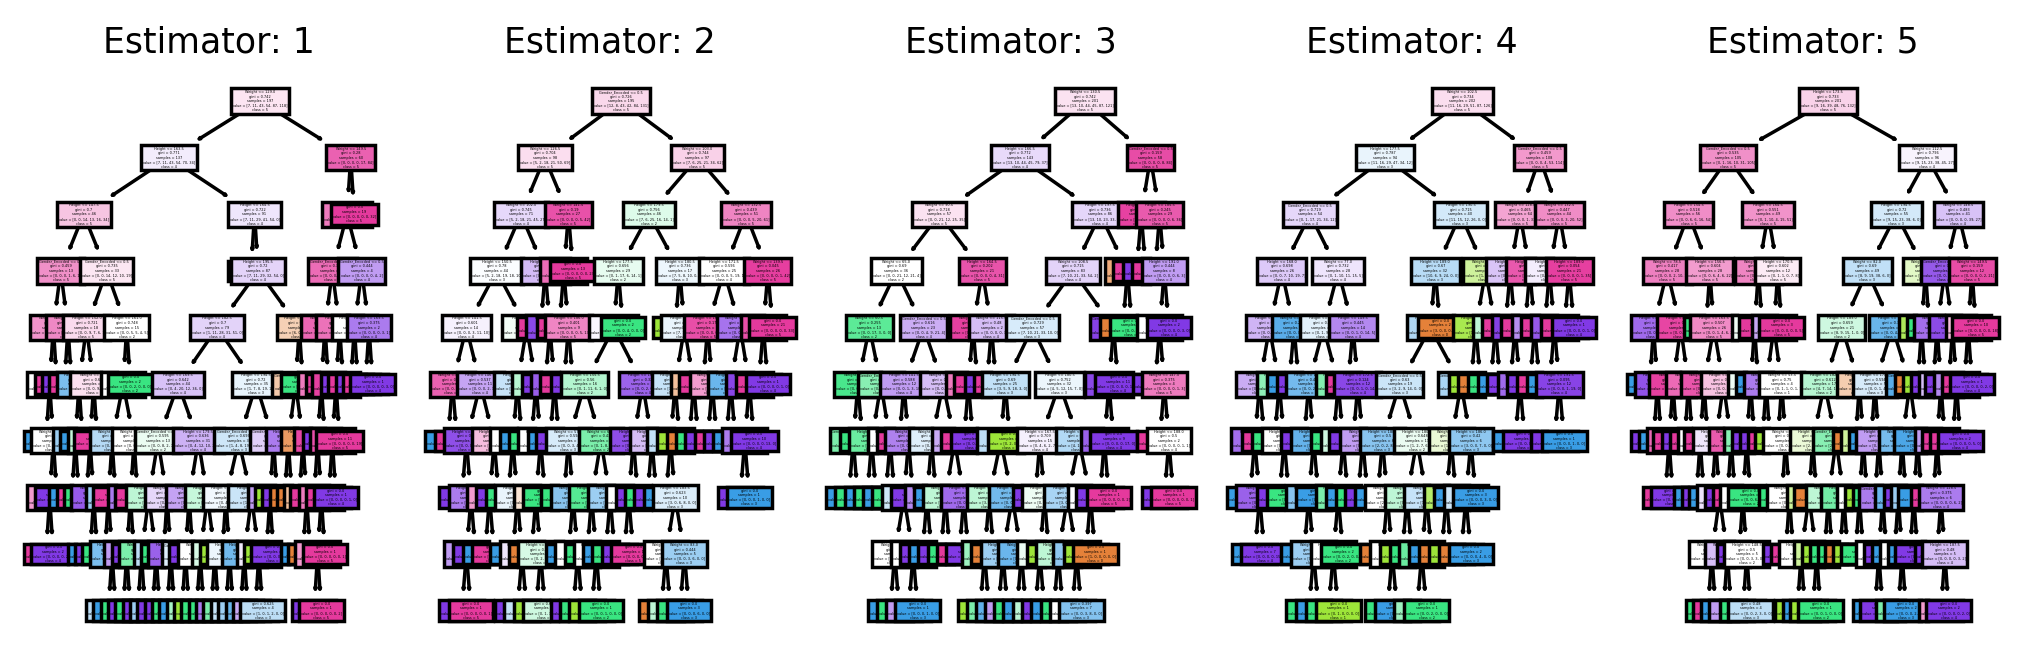

In [13]:
    fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,3), dpi=250)
    for index in range(5):
        tree.plot_tree(rf.estimators_[index],
                    feature_names = X_train.columns.tolist(), 
                    class_names= [f"{i}" for i in range(6)],
                    filled = True,
                    ax = axes[index])

        axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 10)
#     fig.savefig(f'rf_{dt.n_estimators}trees.png')
    plt.show()

In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(confusion_matrix, index=[f"{i}" for i in range(6)], columns=[f"{i}" for i in range(6)])
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", linewidths=0.35, cmap="YlGnBu")
plt.title(f"Model Predictions With {(np.sum(confusion_matrix.diagonal()) / y_test.shape[0]) * 100:.2f}% Accuracy")

In [ ]:
'''
Plot a graph that compares the two models, randomly generated with tuned hyperparameter models
'''
dt_results = []
rf_results = []
n_samples = 40
indexes = [i for i in range(n_samples)]
for i in indexes:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    
    rf = RandomForestClassifier(n_estimators=325, max_depth=8)
    rf.fit(X_train, y_train.values.ravel())
    y_pred_rf = rf.predict(X_test)
    
    confusion_matrix_dt = sklearn.metrics.confusion_matrix(y_test, y_pred_dt)
    confusion_matrix_rf = sklearn.metrics.confusion_matrix(y_test, y_pred_rf)
    
    dt_results.append((np.sum(confusion_matrix_dt.diagonal()) / y_test.shape[0]) * 100)
    rf_results.append((np.sum(confusion_matrix_rf.diagonal()) / y_test.shape[0]) * 100)

plt.plot(indexes, dt_results, label="DT results")
plt.plot(indexes, rf_results, label="RF results")
plt.xlabel("Sample")
plt.ylabel("Accuracy on Test Data in %")
plt.title("Accuracy Comparison Between DT and RF on Randomly Generated Models")
plt.legend()
plt.show()

